In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd

In [4]:
def data_prep(dataset='MNIST', size=-1, dim=70):
    if dataset == 'MNIST':
        X = np.load('../../data/mnist_pca.npy', allow_pickle=True).reshape(70000, -1)
        labels = np.load('../../data/mnist_labels.npy', allow_pickle=True)
    elif dataset == 'mammoth':
        with open('../../data/mammoth_3d.json', 'r') as f:
            X = json.load(f)
        X = np.array(X)
        with open('../../data/mammoth_umap.json', 'r') as f:
            labels = json.load(f)
        labels = labels['labels']
        labels = np.array(labels)
        labels = np.sort(labels)
    elif dataset == 'hierarchical_three':
        X = np.load('../../data/hierarchical_threelayer_dataset.npy', allow_pickle=True)
        labels = np.load("../../data/hierarchical_threelayer_label.npy", allow_pickle=True)
    elif dataset == "ercc":
        X = np.load("../../data/zheng_ercc_log_pca.npy", allow_pickle=True)
        labels = np.zeros(10) # no labels
    elif dataset == "monocyte":
        X = np.load("../../data/zheng_monocyte_log_pca.npy", allow_pickle=True)
        labels = np.zeros(10) # no labels
    elif dataset == 'duo4eq':
        X = np.load("../../data/4eq_log_pca.npy", allow_pickle=True)
        labels = np.load("../../data/4eq_labels.npy", allow_pickle=True)
    elif dataset == 'duo8eq':
        X = np.load("../../data/8eq_log_pca.npy", allow_pickle=True)
        labels = np.load("../../data/8eq_labels.npy", allow_pickle=True)
    elif dataset == 'kazer':
        X = np.load("../../data/hiv_70.npy", allow_pickle=True)
        labels = np.load("../../data/kazer_raw_labels.npy", allow_pickle=True)
    elif dataset == 'stuart':
        X = np.load("../../data/seurat_bmnc_rna_70.npy", allow_pickle=True)
        labels = np.load("../../data/stuart_labels.npy", allow_pickle=True)
    elif dataset == 'muraro':
        X = np.load("../../data/muraro_log_pca.npy", allow_pickle=True)
        labels = np.load("../../data/muraro_labels.npy", allow_pickle=True)
    elif dataset == 'kang':
        X = np.load("../../data/kang_log_pca.npy", allow_pickle=True)
        labels = np.load("../../data/kang_labels.npy", allow_pickle=True)
    elif dataset == 'kazerres':
        X = np.load("../../data/kazer_pcares.npy", allow_pickle=True)
        labels = np.load("../../data/kazer_raw_labels.npy", allow_pickle=True)
    elif dataset == 'micebrain':
        X = np.load("../../data/1M_neurons_100pc_npy.npy", allow_pickle=True)
        labels = np.load("../../data/1M_neurons_cluster_npy.npy", allow_pickle=True)
    elif dataset == 'miceembryo':
        X = np.load('../../data/2M_neurons_100pc_npy.npy', allow_pickle=True)
        labels = np.load('../../data/2M_neurons_label.npy', allow_pickle=True)
        labels += 1 # move one forward
    elif dataset == 'lineage':
        X = np.load('../../data/lineage_dataset.npy', allow_pickle=True)
        labels = np.load('../../data/lineage_label.npy', allow_pickle=True)
    else:
        print('Unsupported dataset')
        assert(False)
    if size != -1:
        X = X[:size, :dim]
        labels = labels[:size]
    else:
        X = X[:, :dim]
    X = X.copy(order='C')
    return X, labels


In [10]:
dataset_names = ['ercc', 'monocyte', 'duo4eq', 'duo8eq', 'kazer']
dataset_names += ['muraro', 'kang', 'stuart']
dataset_names += ['micebrain', 'miceembryo']
dataset_names += ['mammoth', 'hierarchical_three']
dataset_names += ['MNIST']

In [11]:
dataset_cite = {}
dataset_cite['ercc'] = 'Zheng ERCC'
dataset_cite['monocyte'] = 'Zheng Monocyte'
dataset_cite['duo4eq'] = 'Duo 4Eq'
dataset_cite['duo8eq'] = 'Duo 8Eq'
dataset_cite['kazer'] = 'Kazer'
dataset_cite['muraro'] = 'Muraro'
dataset_cite['kang'] = 'Kang'
dataset_cite['stuart'] = 'Stuart'
dataset_cite['mammoth'] = 'Mammoth'
dataset_cite['MNIST'] = 'MNIST'
dataset_cite['hierarchical_three'] = 'Hierarchical'
dataset_cite['micebrain'] = 'Zheng Mouse'
dataset_cite['miceembryo'] = 'Cao'


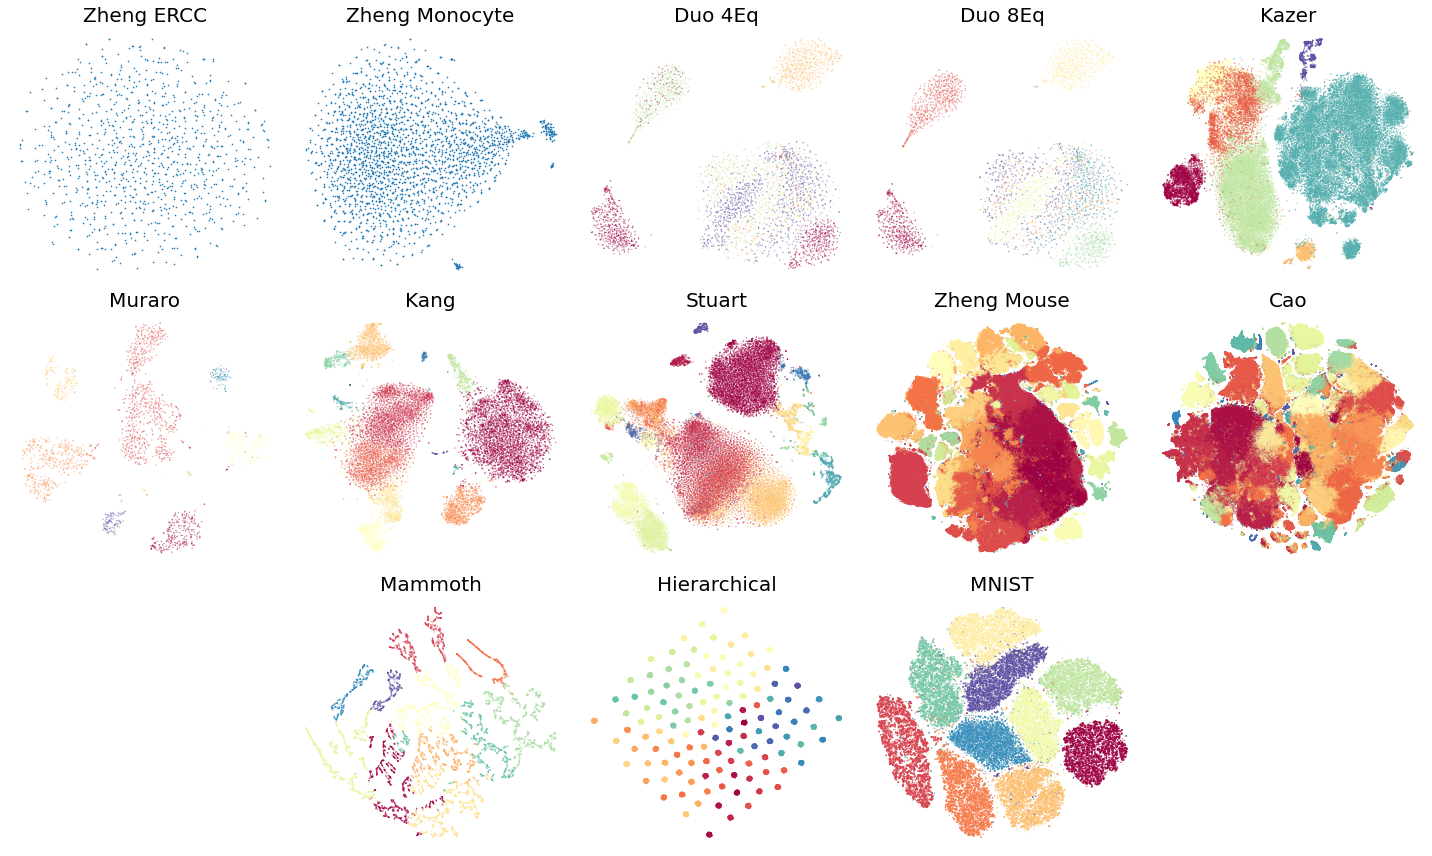

In [13]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()
cnt = 0
for i in range(15):
    if i == 10:
        continue
    if i == 14:
        continue
    ds = dataset_names[cnt]
    _, labels = data_prep(ds)
    dr_data = np.load(f"../../output/{ds}_t-SNE.npy")[0]
    size = labels.shape[0]
    if size > 1e6:
        s = 0.02
    elif size < 2e3:
        s = 0.4
    else:
        s = 0.06
    if i >= 2:
        axes[i].scatter(dr_data[:, 0], dr_data[:, 1], c=labels, cmap='Spectral', s=s)
    else:
        axes[i].scatter(dr_data[:, 0], dr_data[:, 1], s=s)
    axes[i].axis('off')
    axes[i].set_title(dataset_cite[ds], fontsize=20)
    cnt += 1
axes[10].axis('off')
axes[14].axis('off')
plt.tight_layout()
plt.savefig('dataset_vis_t-SNE.png')


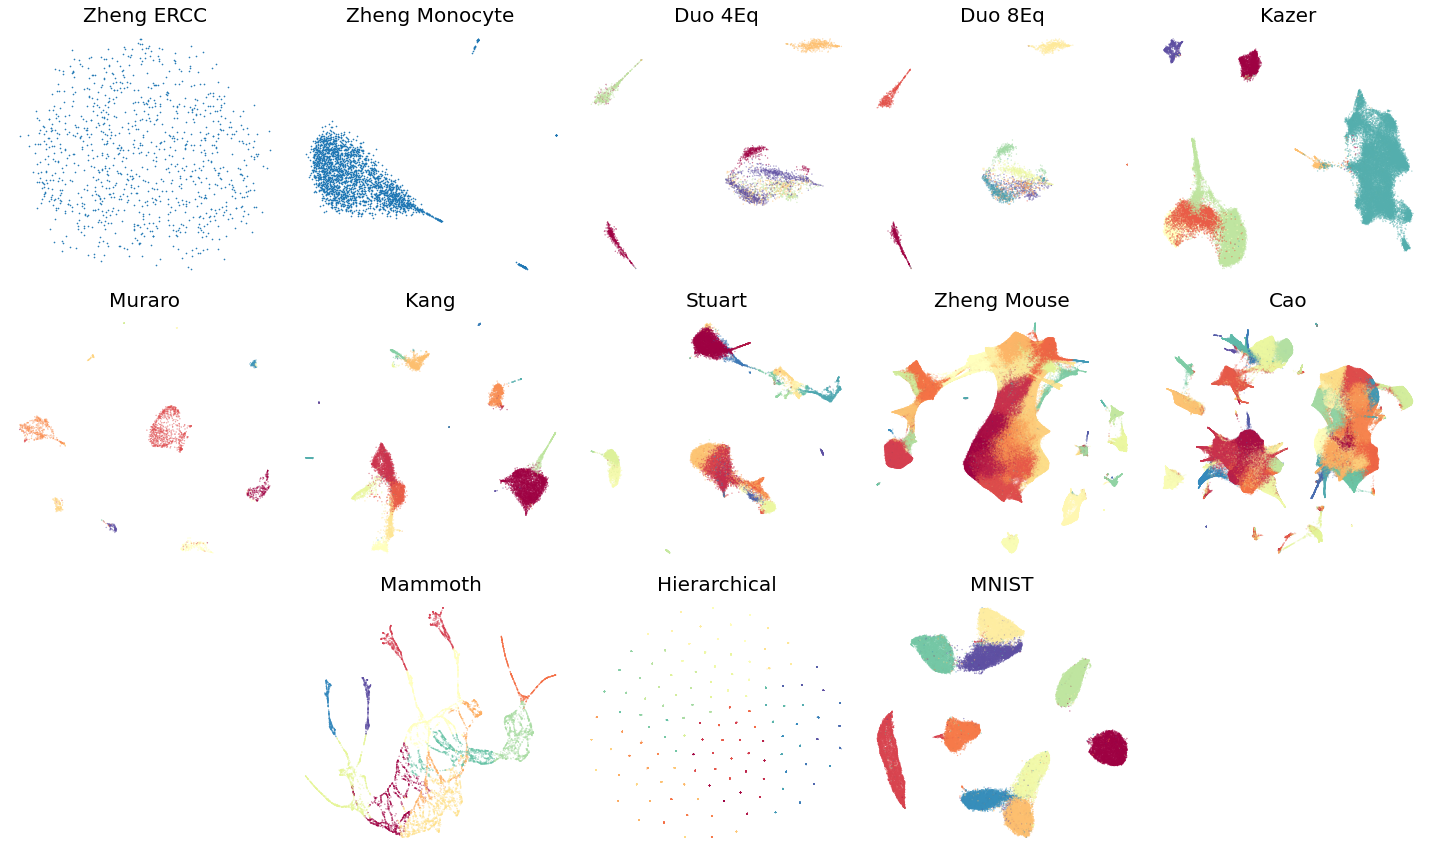

In [14]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()
cnt = 0
for i in range(15):
    if i == 10:
        continue
    if i == 14:
        continue
    ds = dataset_names[cnt]
    _, labels = data_prep(ds)
    dr_data = np.load(f"../../output/{ds}_PaCMAP.npy")[0]
    size = labels.shape[0]
    if size > 1e6:
        s = 0.02
    elif size < 2e3:
        s = 0.4
    else:
        s = 0.06
    if i >= 2:
        axes[i].scatter(dr_data[:, 0], dr_data[:, 1], c=labels, cmap='Spectral', s=s)
    else:
        axes[i].scatter(dr_data[:, 0], dr_data[:, 1], s=s)
    axes[i].axis('off')
    axes[i].set_title(dataset_cite[ds], fontsize=20)
    cnt += 1
axes[10].axis('off')
axes[14].axis('off')
plt.tight_layout()
plt.savefig('dataset_vis_PaCMAP.png')
